# 이코테 2강 그리드& 구현
## 2.1. 그리드 알고리즘
### 거스름돈 문제
화폐의 종류가 K라고 할 때, 소스코드의 시간 복잡도는 O(K)입니다.
이 알고리즘의 시간 복잡도는 거슬러줘야 하는 금액과는 무곤하며, 동전의 총 종류에만 영향을 받습니다.

In [1]:
n=1260
count=0

# 큰 단위의 화폐부터 차례대로 확인하기
array = [500,100,50,10]

for coin in array:
    count += n // coin # 몫-해당 화폐로 거슬러 줄 수 있는 동전의 개수 세기
    n %= coin # 나머지

print(count)

6


### 문제1. 1이 될때까지
어떠한 수 N이 1이 될 때까지 다음의 두 과정 중 하나를 반복적으로 선택하여 수행하려고 합니다. 단 두번째 연산은 N이 k로 나누어 떨어질 때만 선택할 수 있습니다.
1. N에서 1을 뺍니다.
2. N을 k로 나눕니다.

예를 들어, N이 17, K가 4라고 가정합시다. 이때 1번의 과정을 한 번 수행하면 N은 16이 됩니다. 이후에 2번의 과정을 두 번 수행하면 N은 1이 됩니다. 결과적으로 이 경우 전체 과정을 실행한 횟수는 3이 됩니다.
N과 K가 주어질 때 N이 1이 될 때까지 1번 혹은 2번의 과정을 수행해야 하는 최소 횟수를 구하는 프로그램을 작성하세요

In [ ]:
# 주어진 N에 대하여 최대한 많이 나누기
# N의 값을 줄일 때 2 이상의 수로 나누는 작업이 1을 빼는 작업보다 수를 훨씬 많이 줄일 수 있습니다.
# N과 k는 양의 정수라는 가정

n,k=map(int,input().split())
result = 0 # 총 연산 수행 횟수

while True:
    #N이 K로 나누어 떨어지는 수가 될 때까지 빼기
    target = (n//k) * k #1을 빼는 연산 횟수
    result += (n-target) #1을 빼는 연산 횟수를 한번에 더해주기
    n = target #1을 다 빼고 최종 값으로 갱신
    
    #N이 K보다 작을 때 (더 이상 나눌 수 없을 때) 반복문 탈출
    if n<k:
        break
    # K로 나누기
    result += 1
    n//=k # n을 k로 나눈걸 n으로 업데이트

# 마지막으로 남은 수에 대하여 1씩 빼기
result += (n-1)
print(result)

### 문제2. 곱하기 혹은 더하기
- 각 자리가 숫자(0~9)로만 이루어진 문자열 S가 주어졌을 때, 왼쪽부터 오른쪽으로 하나씩 모든 숫자를 확인하며 숫자 사이에 'x'혹은 '+'연산자를 넣어 결과적으로 만들어질 수 있는 가장 큰 수를 구하는 프로그램을 작성하세요.
- 단 +보다 x를 먼저 계산하는 일반적인 방식과는 달리, 모든 연산은 왼쪽에서부터 순서대로 이루어진다고 가정합니다.
- 예를 들어 02894라는 문자열을 만들 수 있는 가장 큰 수는 ((((0+2)*9)*8)*4) = 576 입니다.
- 또한 만들어질 수 있는 가장 큰 수는 항상 20억 이하의 정수가 되도록 입력이 주어집니다.

In [ ]:
# 대부분의 경우 +보다는 x가 더 값을 크게 만듭니다.
# 다만 두 수중에서 하나라도 0이거나 1인 경우, 곱하기보다는 더하기를 수행하는 것이 효율적입니다.
# 따라서 두 수에 대해 연산을 수행할 때, 두 수 중에서 하나라도 1 이하인 경우에는 더하며, 두 수가 모드 2 이상인 경우에는 곱하면 정답입니다.

data = input()

# 첫번째 문자를 숫자로 변경하여 대입
result = int(data[0])

for i in range(1, len(data)): #i=1 두번째 문자열부터 대입
    # 두 수 중에서 하나라도 0이거나 1인 경우, 곱하기보다는 더하기 수행
    num = int(data[i])
    if num<=1 or result<=1:
        result += num
    else:
        result *= num

print(result)

### 문제3. 모험가 길드
- 한 마을에 모험가가 N명 있습니다. 모험가 길드에서는 N명의 모험가를 대상으로 '공포도'를 측정했는데, '공포도'가 높은 모험가는 쉽게 공포를 느껴 위험 상황에서 제대로 대처할 능력이 떨어집니다.
- 모험가 길드장인 동빈이는 모험가 그룹을 안전하게 구성하고자 공포도가 X인 모험가는 반드시 X명 이상으로 구성한 모험가 그룹에 참여해야 여행을 떠날 수 있도록 규정했습니다.
- 동빈이는 최대 몇 개의 모험가 그룹을 만들 수 있는 지 궁금합니다. N명의 모험가에 대한 정보가 주어졌을 때, 여행을 떠날 수 있는 그룹 수의 최댓값을 구하는 프로그램을 작성하세요.

In [1]:
# 12223 -> 그룹 2개
# 오름차순 정렬 이후에 공포도가 가장 낮은 모험가부터 하나씩 확인
# 앞에서부터 공포도를 하나씩 확인하며
# 현재 확인하고 있는 공포도보다 크거나 같다면 이를 그룹으로 설정
# 공포도가 오름차순으로 정렬되어 있어서 항상 최소한의 모험가의 수만 포함하여 그룹을 결성

n = int(input()) # 입력값
data = list(map(int,input().split())) # 한 줄에 공백을 기준으로 입력된 input()을 int 정수로
data.sort() # 오름차순 정렬

result = 0 # 총 그룹의 수
count = 0 # 현재 그룹에 포함된 모험가의 수


# i = 현재 공포도
# count = 현재 그룹에 포함된 모험가 수
for i in data: # 공포도를 낮은 것부터 하나씩 확인
    count += 1 # 현재 그룹에 해당 모험가를 포함시키기
    if count>= i: # 현재 그룹에 포함된 모험가의 수를 현재의 공포도 이상이라면, 그룹 결성하기
        result += 1 # 총 그룹의 수 증가시키기
        count = 0 # 현재 그룹에 포함된 모험가의 수 초기화

print(result) # 총 그룹의 수 출력

5
1 2 2 3 4
2


## 2.2 구현
머릿속에 있는 알고리즘을 소스코드로 바꾸는 과정
- 알고리즘은 간단한데 코드가 지나칠 만큼 길어지는 문제
- 실수 연산을 다루고, 특정 소수점 자리까지 출력해야 하는 문제
- 문자열을 특정한 기준에 따라서 끊어 처리해야 하는 과정
- 적절한 라이브러리를 찾아서 사용해야 하는 문제

In [2]:
# 2차원 공간 = 행렬
for i in range(5):
    for j in range(5):
        print('(',i,',',j,')',end=' ')
    print()

( 0 , 0 ) ( 0 , 1 ) ( 0 , 2 ) ( 0 , 3 ) ( 0 , 4 ) 
( 1 , 0 ) ( 1 , 1 ) ( 1 , 2 ) ( 1 , 3 ) ( 1 , 4 ) 
( 2 , 0 ) ( 2 , 1 ) ( 2 , 2 ) ( 2 , 3 ) ( 2 , 4 ) 
( 3 , 0 ) ( 3 , 1 ) ( 3 , 2 ) ( 3 , 3 ) ( 3 , 4 ) 
( 4 , 0 ) ( 4 , 1 ) ( 4 , 2 ) ( 4 , 3 ) ( 4 , 4 ) 


In [ ]:
# 시뮬레이션 및 완전 탐색 문제 - 2차원 공간에서의 방향 벡터
# 동북서남 
dx = [0,-1,0,1] 
dy = [1,0,-1,0]
# 동 = 오른쪽 행 가만히 열 하나 추가

# 현재위치
x,y=2,2

for i in range(4):
    # 다음 위치
    nx = x + dx[i]
    ny = y + dy[i]
    print(nx,ny)

### 문제1. 상하좌우
- 여행가 A가 N*N 크기의 정사각형 공간 위에 서있습니다. 이 공간은 1*1 크기의 정사각형 으로 나누어져 있습니다.가장 왼쪽 위 좌표는 (1,1)이며, 가장 오른쪽 아래 좌표는 (N,N)에 해당합니다. 여행가 A는 상, 하, 좌, 우 방향으로 이동할 수 있으며, 시작 좌표는 항상 (1,1)입니다. 우리 앞에는 여행가 A가 이동할 계획이 적힌 계획서가 놓여 있습니다.

- 계획서에는 하나의 줄에 띄어쓰기를 기준으로 하여 L,R,U,D 중 하나의 문자가 반복적으로 적혀 있습니다. 각 문자의 의미는 다음과 같습니다.

L(왼쪽으로 한칸이동)
R(오른쪽으로 한칸이동)
U(위쪽으로 한칸이동)
D(아래쪽으로 한칸이동)

- 여행가 A가 N*N 크기의 정사각형 공간을 벗어나는 움직임은 무시됩니다. 예를 들어(1,1)의 위치에서 L혹은 U를 만나면 무시됩니다.

In [6]:
# N 입력받기
n = int(input())
x,y = 1,1
plans = input().split()

# L,R,U,D에 따른 이동 방향
dx = [0,0,-1,1] 
dy = [-1,1,0,0]
move_types = ['L','R','U','D']

# 이동 계획을 하나씩 확인하기
for plan in plans:
    # 이동 후 좌표 구하기
    for i in range(len(move_types)):
        if plan == move_types[i]:
            nx = x + dx[i]
            ny = y + dy[i]
    # 공간을 벗어나는 경우 무시
    if nx<1 or ny<1 or nx>n or ny>n:
        continue
    # 이동 수행
    x,y = nx,ny

print(x,y)

5
R R R U D D
3 4


### 문제2. 시각
- 정수 N이 입력되면 00시 00분 00초부터 N시 59분 59초까지의 모든 시각 중에서 3이 하나라도 포함되는 모든 경우의 수를 구하는 프로그래을 작성하시오.예를 들어 1을 입력했을 때 다음은 3이 하나라도 포함되어 있으므로 세어하 하는 시각입니다.

00시 00분 03초, 00시 13분 30초
- 반면에 다음은 3이 하나도 포함되어 있지 않으므로 세면 안되는 시각입니다,

00시 02분 55초, 01시 27분 45초

In [7]:
# 완전 탐색 문제 유형
# 가능한 모든 시각의 경우를 하나씩 다 세서 풀수 있는 문제
# 하루는 86400초이므로, 00시 00분 00초부터 23시 59분 59초까지의 모든 경우의 수가 86400가지입니다.
# 24*60*60 = 86400
# 단순히 시각을 1씩 증가시키면서 3이 하나라도 포함되어 있는지를 확인하면 됩니다.

# H 입력 받기
h = int(input())

count = 0
for i in range(h+1): # 시간
    for j in range(60): # 분
        for k in range(59): #초
            # 매 시각 안에 '3'이 포함되어 있다면 카운트 증가
            if '3' in str(i) + str(j) + str(k):
                count += 1

print(count)

1
3120


### 문제3. 왕실의 나이트
- 행복 왕국의 왕실 정원은 체스판과 같은 8*8 좌표 평면입니다. 왕실 정원의 특정한 한 칸에 나이트가 서있습니다. 나이트는 매우 충성스러운 신하로 매일 무술을 연마합니다.
- 나이트는 말을 타고 있기 때문에 이동할 때는 L자 형태로만 이동할 수 있으며 정원 밖으로는 나갈 수 없습니다.
- 나이트는 특정 위치에서 다음과 같은 2가지 경우로 이동할 수 있습니다.

1.수평으로 두 칸 이동한 뒤에 수직으로 한 칸 이동하기

2.수직으로 두 칸 이동한 뒤에 수평으로 한 칸 이동하기

- 나이트가 이동할 수 있는 경우의 수를 출력하는 프로그램을 작성하세요, 왕실의 정원에서 행 위치를 표현할 때는 1부터 8로 표현하며, 열 위치를 표현할 때는 a부터 h로 표현합니다.

c2에 있을 때 이동할 수 있는 경우의 수는 6가지입니다.

In [15]:
# 현재 나이트의 위치 입력받기
input_data = input() # 현재위치
row = int(input_data[1]) 
#행위치=두번째 위치의 문자를 숫자로 바꾼 값
column = int(ord(input_data[0])) - int(ord('a')) + 1
#열위치=문자로들어온 첫번째 값을 아스키 코드 형태로 바꾸고 'a'의 아스키코드를 더하고 1을 더함


# 나이트가 이동할 수 있는 8가지 방향 정의 - 튜플
steps = [(-2,-1),(-1,-2),(1,-2),(2,-1),(2,1),(1,2),(-1,2),(-2,1)]

# 8가지 방향에 대하여 각 위치로 이동이 가능한지 확인
result = 0
for step in steps:
    # 이동하고자 하는 위치 확인
    next_row = row + step[0]
    next_column = column + step[1]
    # 해당 위치로 이동이 가능하다면 카운트 증가
    if next_row >=1 and next_row <=8 and next_column >=1 and next_column <= 8:
        result +=1

print(result)

c2
6


### 문제4. 문자열 재정렬
- 알파벳 대문자와 숫자(0~9)로만 구성된 문자열이 입력으로 주어집니다. 이때 모든 알파벳을 오름차순으로 정렬하여 이어서 출력한 뒤에, 그 뒤에 모든 숫자를 더한 값을 이어서 출력합니다.
- 예를 들어 K1KA5CB7이라는 값이 들어오면 ABCKK13을 출력합니다.

In [17]:
# 숫자인 경우 따로 합계를 계산하고 알파벳인 경우 별도의 리스트에 저장합니다.

data = input()
result = []
value = 0

# 문자를 하나씩 확인하며
for x in data:
    # 알파벳인 경우 결과 리스트에 삽입
    if x.isalpha():
        result.append(x)
    # 숫자는 따로 더하기
    else:
        value += int(x)

# 알파벳을 오름차순으로 정렬
result.sort()

# 숫자가 하나라도 존재하는 경우 가장 뒤에 삽입
if value != 0:
    result.append(str(value))

# 최종 결과 출력(리스트를 문자열로 변환하여 출력)
print(''.join(result))

K1KA5CB7
ABCKK13


# 이코테 3강 DFS & BFS
탐색(Search) : 많은 양의 데이터가 있을 때 원하는 데이터를 찾는 과정
매우 자주 등장하는 유형이므로 반드시 숙지해야 합니다.
### 스택 자료구조 - 선입후출(먼저 들어오면 나중에 나가기)

In [18]:
# 리스트 자료형 이용 append & pop
stack = []

# 삽입(5)-삽입(2)-삽입(3)-삽입(7)-삭제()-삽입(1)-삽입(4)-삭제()
stack.append(5)
stack.append(2)
stack.append(3)
stack.append(7)
stack.pop()
stack.append(1)
stack.append(4)
stack.pop()

print(stack[::-1]) # 최상단 원소부터 출력 - 먼저 꺼내는 순서
print(stack) # 최하단 원소부터 출력 - 나중에 나가는 순서

[1, 3, 2, 5]
[5, 2, 3, 1]


### 큐 자료구조 - 선입선출(입구와 출구가 모두 뚫려 있는 터널과 같은 형태)

In [21]:
# 큐(Queue) 구현을 위해 deque 라이브러리 사용
from collections import deque
queue = deque()

# 삽입(5)-삽입(2)-삽입(3)-삽입(7)-삭제()-삽입(1)-삽입(4)-삭제()
queue.append(5)
queue.append(2)
queue.append(3)
queue.append(7)
queue.popleft()
queue.append(1)
queue.append(4)
queue.popleft()

print(queue)# 먼저 들어온 순서대로 출력
queue.reverse() # 역순으로 바꾸기
print(queue)# 나중에 들어온 원소부터 출력

deque([3, 7, 1, 4])
deque([4, 1, 7, 3])


### 재귀함수 - 자기 자신을 다시 호출하는 함수
- '재귀 함수를 호출합니다'라는 문자열을 무한히 출력합니다.
- 어느 정도 출력하다가 최대 재귀 깊이 초과 메시지가 출력됩니다.
- 반복문을 이요하여 동일한 기능 구현 O
- 스택 라이브러리 대신에 재귀 함수를 이용하는 경우가 많다.

In [23]:
def recursize_function():
    print('재귀 함수를 출력합니다.')
    recursize_function()

recursize_function()

재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를

재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를 출력합니다.
재귀 함수를

RecursionError: maximum recursion depth exceeded while calling a Python object

- 재귀 함수를 문제 풀이에서 사용할 때는 재귀 함수의 종료 조건을 반드시 명시해야 합니다.
- 종료 조건을 제대로 명시하지 않으면 함수가 무한히 호출될 수 있습니다.

In [25]:
def recursize_function(i):
    # 100번째 호출을 했을 때 종료되도록 종료 조건 명시
    if i == 100:
        return
    print(i,'번째 재귀함수에서',i+1,'번째 재귀함수를 호출합니다.')
    recursize_function(i+1)
    
    # 스택형태 - 가장 마지막부터 꺼낸다.
    print(i,'번째 재귀함수를 종료합니다.')

recursize_function(1)

1 번째 재귀함수에서 2 번째 재귀함수를 호출합니다.
2 번째 재귀함수에서 3 번째 재귀함수를 호출합니다.
3 번째 재귀함수에서 4 번째 재귀함수를 호출합니다.
4 번째 재귀함수에서 5 번째 재귀함수를 호출합니다.
5 번째 재귀함수에서 6 번째 재귀함수를 호출합니다.
6 번째 재귀함수에서 7 번째 재귀함수를 호출합니다.
7 번째 재귀함수에서 8 번째 재귀함수를 호출합니다.
8 번째 재귀함수에서 9 번째 재귀함수를 호출합니다.
9 번째 재귀함수에서 10 번째 재귀함수를 호출합니다.
10 번째 재귀함수에서 11 번째 재귀함수를 호출합니다.
11 번째 재귀함수에서 12 번째 재귀함수를 호출합니다.
12 번째 재귀함수에서 13 번째 재귀함수를 호출합니다.
13 번째 재귀함수에서 14 번째 재귀함수를 호출합니다.
14 번째 재귀함수에서 15 번째 재귀함수를 호출합니다.
15 번째 재귀함수에서 16 번째 재귀함수를 호출합니다.
16 번째 재귀함수에서 17 번째 재귀함수를 호출합니다.
17 번째 재귀함수에서 18 번째 재귀함수를 호출합니다.
18 번째 재귀함수에서 19 번째 재귀함수를 호출합니다.
19 번째 재귀함수에서 20 번째 재귀함수를 호출합니다.
20 번째 재귀함수에서 21 번째 재귀함수를 호출합니다.
21 번째 재귀함수에서 22 번째 재귀함수를 호출합니다.
22 번째 재귀함수에서 23 번째 재귀함수를 호출합니다.
23 번째 재귀함수에서 24 번째 재귀함수를 호출합니다.
24 번째 재귀함수에서 25 번째 재귀함수를 호출합니다.
25 번째 재귀함수에서 26 번째 재귀함수를 호출합니다.
26 번째 재귀함수에서 27 번째 재귀함수를 호출합니다.
27 번째 재귀함수에서 28 번째 재귀함수를 호출합니다.
28 번째 재귀함수에서 29 번째 재귀함수를 호출합니다.
29 번째 재귀함수에서 30 번째 재귀함수를 호출합니다.
30 번째 재귀함수에서 31 번째 재귀함수를 호출합니다.
31 번째 재귀함수에서 32 번째 재귀함수를 호출합니다.
32 번째 재귀함수에서 33 번째 재귀함수를 

### 재귀함수 - 팩토리얼 구현 예제
0! = 1! = 1

In [33]:
# 반복적으로 구현한 n!
def factorial_iteration(n):
    result = 1
    # 1부터 n까지의 수를 차례대로 곱하기
    for i in range(1,n+1):
        result *= i
    return result

# 재귀적으로 구현한 n!
def factorial_recursive(n):
    if n <= 1: #n이 1이하인 경우 1을 반환
        return 1
    # n! = n*(n-1)!를 그대로 코드로 작성하기
    return n*factorial_recursive(n-1)

# 각각의 방식으로 구현한 n! 출력 (n=5)
print('반복적으로 구현:',factorial_iteration(5))
print('재귀적으로 구현:',factorial_recursive(5))

반복적으로 구현: 120
재귀적으로 구현: 120


### 재귀함수 - 최대공약수 계산(유클리드 호제법) 예제
- 두 개의 자연수에 대한 최대공약수를 구하는 대표적인 알고리즘으로는 유클리드 호제법이 있습니다.
- 유클리드 호제법

두 자연수 A,B에 대하여 (A>B) A를 B로 나눈 나머지를 R이라고 합시다.
이때 A와 B의 최대공약수는 B와 R의 최대공약수와 같습니다.

In [35]:
#GCD(192,162)=GCD(162,192%162=30)=GCD(30,162%30=12)=GCD(12,30%12=6)=6

def gcd(a,b):
    if a%b == 0:
        return b
    else:
        return gcd(b,a%b)

print(gcd(192,162))

6


## 3.1 DFS(Depth-First Search,깊이 우선 탐색)
- 스택 자료구조 혹은 재귀 함수 이용


1. 탐색 시작 노드를 스택에 삽입하고 방문 처리를 합니다.
2. 스택의 최상단 노드에 방문하지 않은 인접한 노드가 하나라도 있으면 그 노드를 스택에 넣고 방문 처리합니다. 방문하지 않은 인접 노드가 없으면 스택에서 최상단 노드를 꺼냅니다.
3. 더 이상 2번의 과정을 수행할 수 없을 때까지 반복합니다.


- 방문기준 : 번호가 낮은 인접 노드부터
- 시작노드 : 1 
- 방문하지 않은 노드 2,3,8 중 가장 작은 노드 2를 우선 방문 -> 2 기준 방문하지 않은 노드 7 방문 -> 반복
- 그래프에서 가장 깊게 들어올때까지 반복한다.
- 더이상 들어갈 수 없으면 마지막 스택 꺼내기->7에서 방문하지 않은 노드 8로 이동
- 더이상 할게 없으면 다시 7->2->1로 이동해서 3으로 이동한다.
- 3->4->5
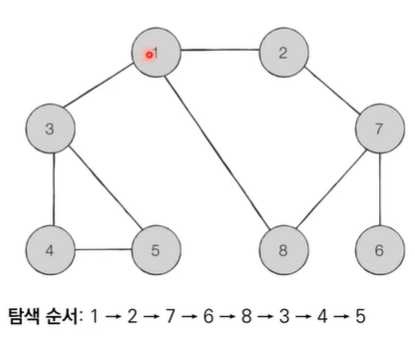

In [39]:
# DFS 메서드 정의
def dfs(graph,v,vistied):
    # 현재 노드를 방문 처리
    visited[v] = True
    print(v,end=' ')
    
    # 현재 노드와 연결된 다른 노드를 재귀적으로 방문
    for i in graph[v]:
        if not visited[i]:
            dfs(graph,i,visited)

In [40]:
# 각 노드가 연결된 정보를 표현 (2차원 리스트)
graph = [
    [], #노드가 1번부터 시작하는 경우-인덱스 0에 대한 것은 비워두기
    [2,3,8], #각 노드와 인접한 노드 담기
    [1,7],
    [1,4,5],
    [3,5],
    [3,4],
    [7],
    [2,6,8],
    [1,7]
]

# 각 노드가 방문된 정보를 표현 (1차원 리스트)
visited = [False] * 9
# 기본적으로 모든 값을 False로 해서 모든 노드를 하나도 방문하지 않은 것처럼 처리
# 1번부터 8번 노드까지 가지고 있고, 인덱스 0을 사용하지 않기 위하여
# 하나 더 큰 숫자로 1차원 리스트를 초기화할 수 있다.


# 정의된 DFS 함수 호출
dfs(graph,1,visited)

1 2 7 6 8 3 4 5 

## 3.2 BFS(Breadth-First Search, 너비 우선 탐색)
- 그래프에서 가까운 노드부터 우선적으로 탐색하는 알고리즘
- 큐 자료구조 이용


1. 탐색 시작 노드를 큐에 삽입하고 방문 처리를 합니다.
2. 큐에서 노들를 꺼낸 뒤 해당 노드의 인접 노드 중에서 방문하지 않은 노드를 모두 큐에 삽입하고 방문처리합니다.
3. 더 이상 2번의 과정을 수행할 수 없을 때까지 반복합니다.


- 방문기준 : 번호가 낮은 인접 노드부터
- 시작노드 : 1 
- 1 -> 차례대로 (작은 번호부터 가정)2,3,8 방문처리 수행 -> 2에서 인접한 노드 1,7 중 7 진행 -> 3에서 인접한 4,5 진행 -> 8에서 인접한 노드 1,7 모두 진행되었음. 꺼내고 무시
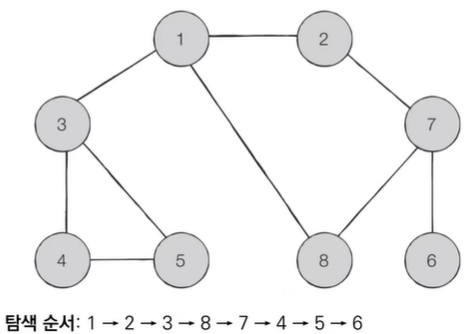

In [41]:
from collections import deque

# BFS 메서드 정의
def bfs(graph,start,visited):
    # 큐(Queue) 구현을 위해 deque 라이브러리 사용
    queue = deque([start])
    # 현재 노드를 방문 처리
    visited[start] = True
    # 큐가 빌 때까지 반복
    while queue:
        # 큐에서 하나의 원소를 뽑아 출력하기 - 가장 먼저 들어온 원소부터
        v = queue.popleft()
        print(v, end=' ')
        # 아직 방문하지 않은 인접한 원소들을 큐에 삽입
        for i in graph[v]:
            if not visited[i]:
                queue.append(i)
                visited[i] = True

In [42]:
# 각 노드가 연결된 정보를 표현 (2차원 리스트)
graph = [
    [],
    [2,3,8],
    [1,7],
    [1,4,5],
    [3,5],
    [3,4],
    [7],
    [2,6,8],
    [1,7]
]

# 각 노드가 방문된 정보를 표현 (1차원 리스트)
visited = [False] * 9

# 정의된 BFS 함수 호출
bfs(graph,1,visited)

1 2 3 8 7 4 5 6 

### 문제1. 음료수 얼려 먹기
- N*M 크기의 얼음 틀이 있습니다. 구멍이 뚫려 있는 부분은 0, 칸막이가 존재하는 부분은 1로 표시됩니다. 구멍이 뚫려 있는 부분끼리 상,하,좌,우로 붙어 있는 경우 서로 연결되어 있는 것으로 간주합니다.
- 이때 얼음 틀의 모양이 주어졌을 때 생성되는 총 아이스크림의 개수를 구하는 프로그램을 작성하세요.
- 4*5 얼음 틀 예시에서는 아이스크림이 총 3개 생성됩니다.
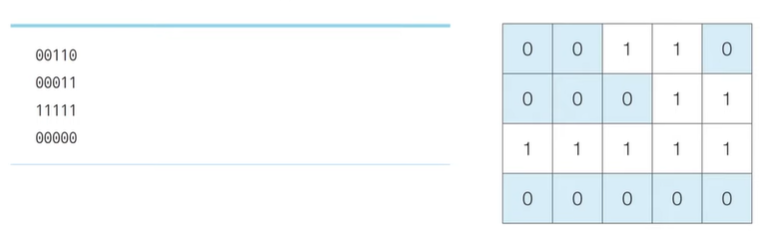

In [43]:
# 연결 요소의 개수 구하기 - 그래프 형태로 모델링하기
# 상하좌우를 서로 인접한 노트 형태로

# DFS 활용
# 값이 0이면서 아직 방문하지 않은 지점이 있다면 해당 지점 방문
# 방문한 지점에서 상하좌우 반복 진행 - 연결된 모든 지점을 방문
# 방문하지 않은 지점의 수를 카운트한다.


# DFS로 특정 노드를 방문하고 연결된 모든 노드들도 방문
def dfs(x,y):
    # 주어진 범위를 벗어나는 경우에는 즉시 종료
    if x<= -1 or x>= n or y<=-1 or y>=m:
        return False
    # 현재 노드를 아직 방문하지 않았다면
    if graph[x][y] == 0:
        # 해당 노드 방문 처리
        graph[x][y] = 1
        # 상 하 좌 우의 위치들도 모두 재귀적으로 호출
        dfs(x-1,y)
        dfs(x,y-1)
        dfs(x+1,y)
        dfs(x,y+1)
        return True
    return False


In [45]:
# N, M을 공백을 기준으로 구분하여 입력 받기
n,m = map(int,input().split())

# n줄에 걸쳐서 2차원 리스트의 맵 정보 입력 받기
graph = []
for i in range(n):
    graph.append(list(map(int,input()))) 
    # 공백없이 0과 1 문자열 형태로 입력되므로 정수형으로 바꿔서 list변환해준다.

# 모든 노드(위치)에 대하여 음료수 채우기
result = 0
for i in range(n):
    for j in range(m):
        # 현재 위치에서 DFS 수행
        if dfs(i,j) == True:
            result += 1

print(result) # 정답 출력

2 2
00
10
1


### 문제2. 미로 탈출
- 동빈이는 N*M 크기의 직사각형 형태의 미로에 갇혔습니다. 미로에는 여러 마리의 괴물이 있어 이를 피해 탈출해야 합니다.
- 동빈이의 위치는 (1,1)이며 미로의 출구는 (N,M)의 위치에 존재하며 한 번에 한 칸씩 이동할 수 있습니다. 이때 괴물이 있는 부분은 0으로, 괴물이 없는 부분은 1로 표시되어 있습니다. 미로는 반드시 탈출할 수 있는 형태로 제시됩니다.
- 이때 동빈이가 탈출하기 위해 움직여야 하는 최소 칸의 개수를 구하세요. 칸을 셀 때는 시작 칸과 마지막 칸을 모두 포함해서 계산합니다.
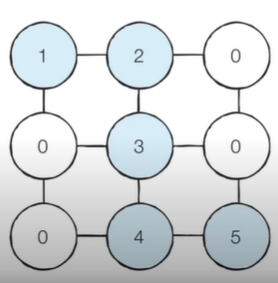

In [51]:
# BFS - 시작 지점부터 가까운 노드부터 차례대로 그래프의 모든 노드를 탐색
# 가장 왼쪽 위 지점부터 모든 노드의 최단 거리 값을 기록


from collections import deque

# BFS 소스코드 구현
def bfs(x,y):
    # 큐(Queue) 구현을 위해 deque 라이브러리 사용
    queue = deque()
    queue.append((x,y))
    # 큐가 빌 때까지 반복하기
    while queue:
        # 큐에서 하나의 원소를 뽑아 출력하기 - 가장 먼저 들어온 원소부터
        x,y=queue.popleft()
        # 현재 위치에서 4가지 방향으로의 위치 확인
        for i in range(4):
            nx = x+dx[i]
            ny = y+dy[i]
            # 미로 찾기 공간을 벗어난 경우 무시
            if nx<0 or nx>=n or ny<0 or ny>=m:
                continue
            # 벽인 경우 무시(괴물존재하는 경우)
            if graph[nx][ny] == 0:
                continue
            # 해당 노도를 처음 방문하는 경우에만 최단 거리 기록
            if graph[nx][ny] == 1:
                # 바로 직전 노드에서의 최단 길이 값 + 1
                graph[nx][ny] = graph[x][y] + 1
                queue.append((nx,ny))
    # 가장 오른쪽 아래까지의 최단 거리 반환
    return graph[n-1][m-1]

In [52]:
# N,M을 공백을 기준으로 구분하여 입력 받기
n,m = map(int,input().split())

# 2차원 리스트이 맵 정보 입력 받기
graph = []
for i in range(n):
    graph.append(list(map(int,input())))

# 이동할 네 가지 방향 정의 (상하좌우)
dx=[-1,1,0,0]
dy=[0,0,-1,1]

# BFS를 수행한 결과 출력
print(bfs(0,0))

3 3
110
010
011
5


# 이코테 4강 정렬 알고리즘
정렬(sorting):데이터를 특정한 기준에 따라 순서대로 나열하는 것
## 선택 정렬
- 처리되지 않은 데이터 중에서 가장 작은 데이터를 선택해 맨 앞에 있는 데이터와 바꾸는 것
- 이중 반복문 이용
- 선택 정렬의 시간 복잡도
N번 만큼 가장 작은 수를 찾아서 맨 앞으로 보내야 하기 때문에 전체 연산횟수는 N+(N-1)+...+2 = (N^2+N-2)/2 = O(N^2)이다.

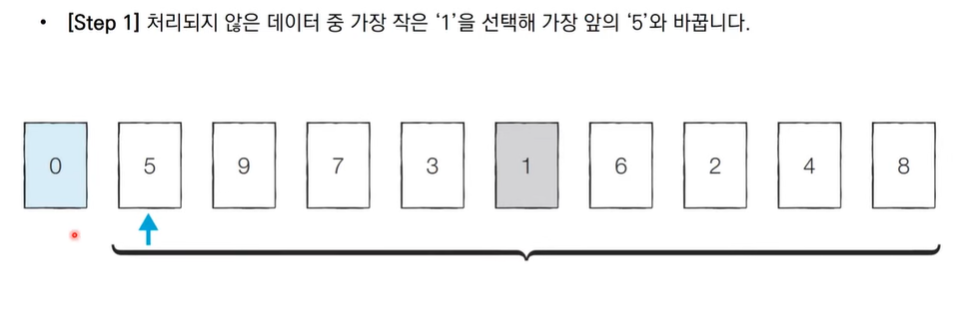

In [53]:
array = [7,5,9,0,3,1,6,2,4,8]

for i in range(len(array)):
    min_index = i # 가장 작은 원소의 인덱스
    for j in range(i+1, len(array)):
        if array[min_index] > array[j]:
            min_index = j
    array[i], array[min_index] = array[min_index], array[i] # 스와프 - 두 원소 위치 바꾸기

print(array)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


 ## 삽입 정렬
 - 처리되지 않은 데이터를 하나씩 골라 적절한 위치에 삽입합니다.구현 난이도 높지만 더 효율적이다.

- 시간복잡도는 O(N^2)로, 선택 정렬과 마찬가지로 반복문이 두 번 중첩되어 사용됩니다. 최선의 경우(=이미 정렬되어 있는 상태) O(N)의 시간 복잡도를 가집니다.

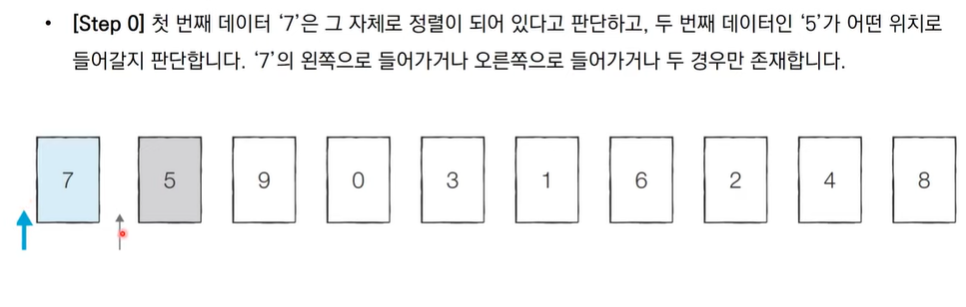

In [54]:
array = [7,5,9,0,3,1,6,2,4,8]

for i in range(1, len(array)):
    for j in range(i,0,-1): # 인덱스 i부터 1까지 1씩 감소하며 반복하는 문법
        if array[j] < array[j-1]: #한 칸씩 왼쪽으로 이동
            array[j],array[j-1] = array[j-1],array[j]
        
        #자기보다 작은 데이터를 만나면 그 위치에서 멈춤
        else:
            break
print(array) 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## 퀵 정렬
- 기준 데이터를 설정하고 그 기준보다 큰 데이터와 작은 데이터의 위치를 바꾸는 방법
- 가장 기본적인 퀵 정렬은 첫 번째 데이터를 기준 데이터(pivot)으로 설정합니다.

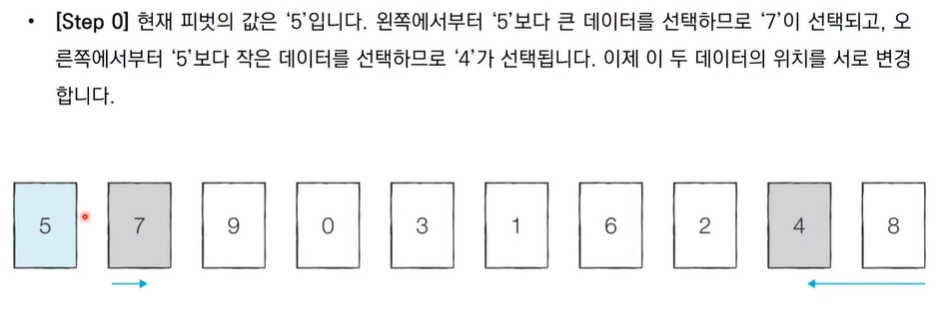

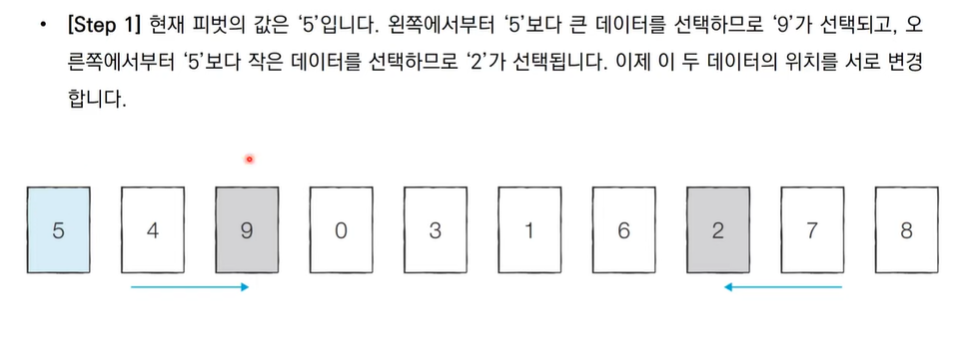

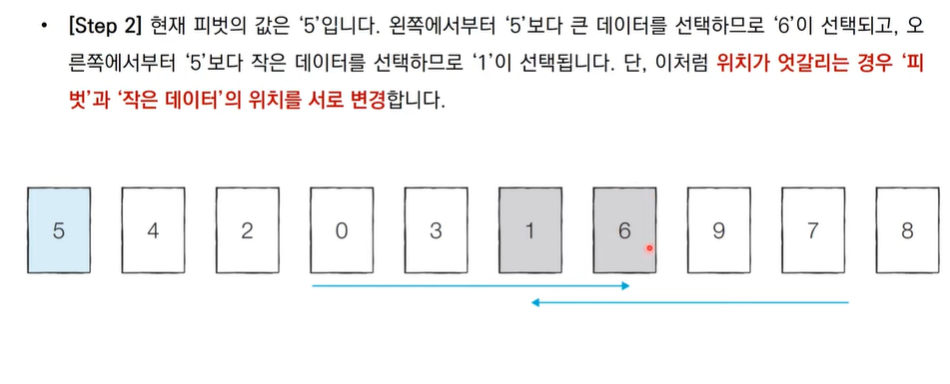

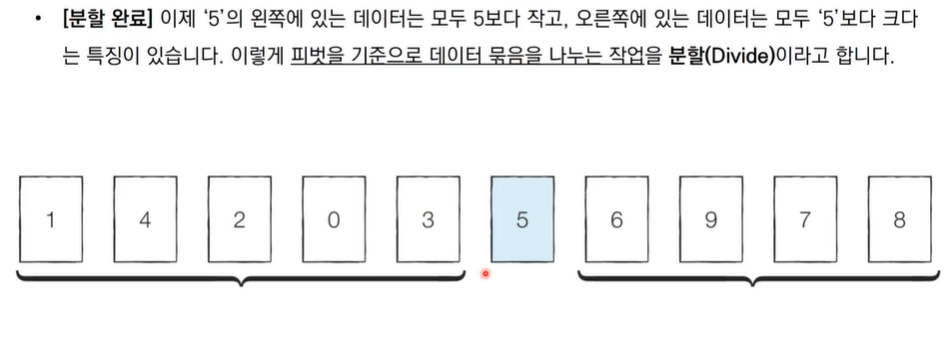

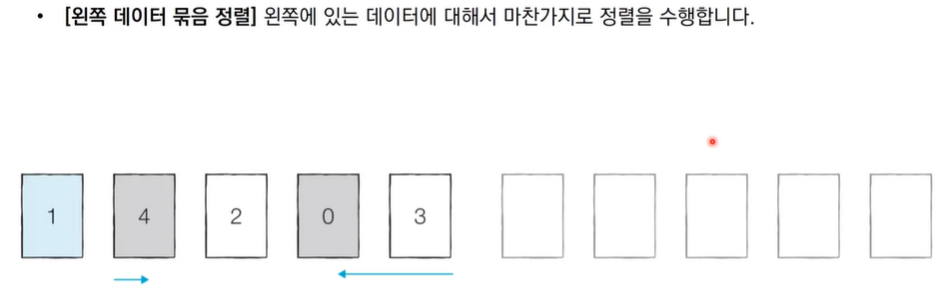

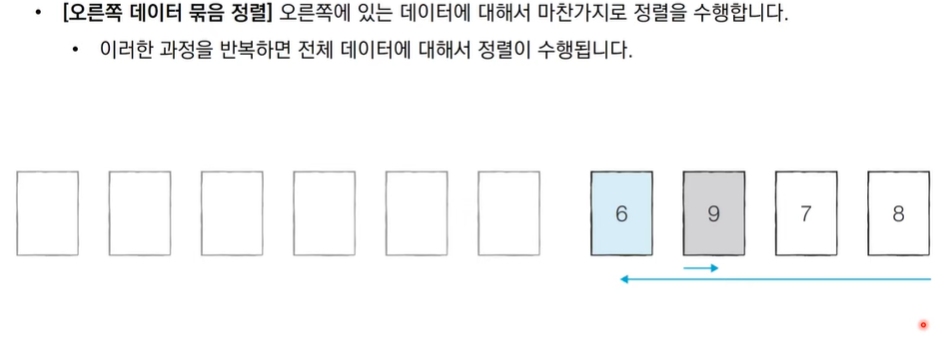

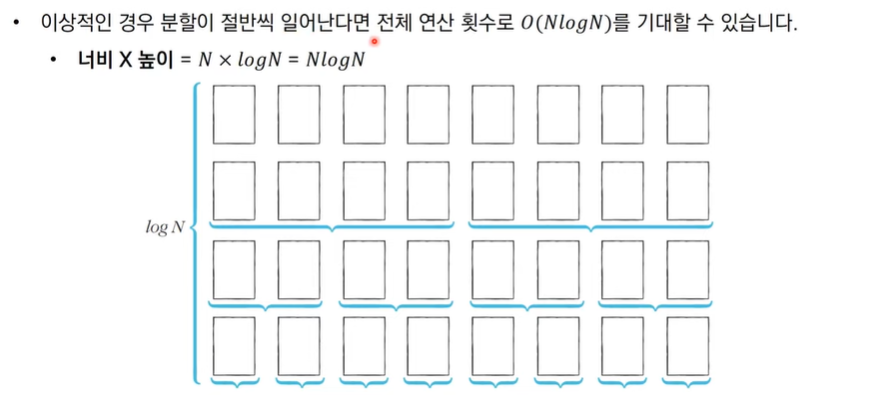

- 퀵 정렬은 평균의 경우 O(NlogN)의 시간 복잡도를 가진다.
- 최악의 경우(=이미 정렬되어 있는 경우), O(N^2)의 시간 복잡도를 가진다.

In [55]:
array = [5,7,9,0,3,1,6,2,4,8]

def quick_sort(array,start,end):
    if start>=end: # 원소가 1개인 경우 종료
        return
    pivot = start # 피벗은 첫 번째 원소
    left = start + 1
    right = end
    
    while (left <= right):
        # 피벗보다 큰 데이터를 찾을 때까지 반복
        while (left <= end and array[left] <= array[pivot]):
            left += 1
        # 피벗보다 작은 데이터를 찾을 때까지 반복
        while (right > start and array[right] >= array[pivot]):
            right -= 1
        
        if (left > right): # 엇갈렸다면 작은 데이터와 피벗을 교체
            array[right],array[pivot] = array[pivot],array[right]
        else: # 엇갈리지 않았다면 작은 데이터와 큰 데이터를 교체
            array[left],array[right] = array[right],array[left]
    
    # 분할 이후 왼쪽 부분과 오른쪽 부분에서 각각 정렬 수행
    quick_sort(array, start, right-1)
    quick_sort(array, right+1, end)

quick_sort(array,0,len(array)-1)
print(array)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [57]:
# 파이썬 리스트를 활용하여 간결하게 코드 작성하는 방법

array = [5,7,9,0,3,1,6,2,4,8]

def quick_sort(array):
    # 리스트가 하나 이하의 원소만을 담고 있다면 종류
    if len(array) <= 1:
        return array
    pivot = array[0] # 피벗은 첫 번째 원소
    tail = array[1:] # 피벗을 제외한 리스트
    
    left_side = [x for x in tail if x <= pivot] #분할된 왼쪽 부분
    right_side = [x for x in tail if x > pivot]#분할된 오른쪽 부분
    
    # 분할 이후 왼쪽 부분과 오른쪽 부분에서 각각 정렬 수행하고, 전체 리스트 반환
    return quick_sort(left_side) + [pivot] + quick_sort(right_side)

print(quick_sort(array))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## 계수 정렬
- 특정한 조건이 부합할 때만 사용할 수 있지만 매우 빠르게 동작하는 정렬 알고리즘
- 데이터의 크기 범위가 제한되어 정수 형태로 표현할 수 있을 때 사용 가능
- 데이터개수가 N.데이터(양수) 중 최대값이 K일 때, 최악의 경우에도 수행시간 O(N+K)를 보장한다.

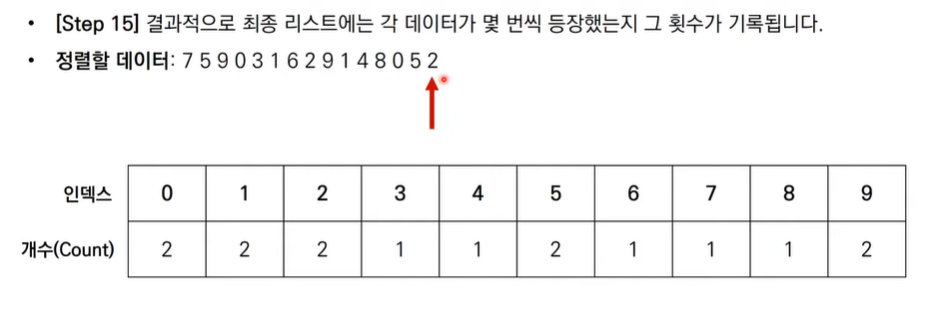

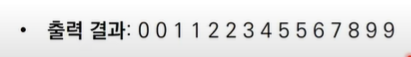

In [60]:
# 모든 원소의 값이 0보다 크거나 같다고 가정
array = [7,5,9,0,3,1,6,2,9,1,4,8,0,5,2]
# 모든 범위를 포함하는 리스트 선언(모든 값은 0으로 초기화)
count = [0] * (max(array)+1)


# 데이터를 확인하면서 데이터에 해당하는 인덱스 값를 기록
for i in range(len(array)):
    count[array[i]] += 1 # 각 데이터에 해당하는 인덱스의 값 증가

# 인덱스 확인하면서 해당 인덱스를 값으로 가지는 데이터가 몇개 있는지 확인
for i in range(len(count)): # 리스트에 기록된 정렬 정보 확인
    for j in range(count[i]):
        print(i, end=' ') # 띄어쓰기를 구분으로 등장한 횟수만큼 인덱스 출력


0 0 1 1 2 2 3 4 5 5 6 7 8 9 9 

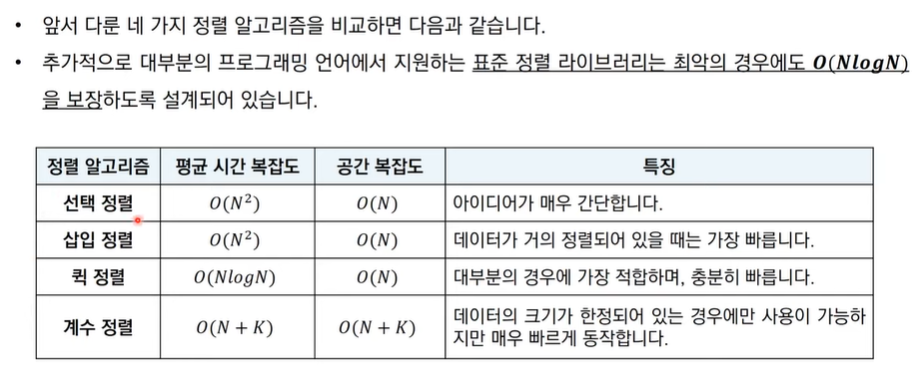

### 문제1. 두 배열의 원소 교체
- 동빈이는 두 개의 배열 A와 B를 가지고 있습니다. 두 배열을 N개의 원소로 구성되어 있으며, 배열의 원소는 모두 자연수입니다.
- 동빈이는 최대 K번의 바꿔치기 연산을 수행할 수 있는데, 바꿔치기 연산이란 배열 A의 원소 하나와 배열 B의 원소 하나를 골라서 두 원소를 서로 바꾸는 것을 말합니다.
- 동빈이의 최종 목표는 배열 A의 모든 원소의 합이 최대가 되도록 하는 것이며, 여러분은 동빈이를 도와야 합니다.
- N,K, 그리고 배열 A와 B의 정보가 주어졌을 때, 최대 K번의 바꿔치기 연산을 수행하여 만들 수 있는 배열 A의 모든 원소의 합의 최댓값을 출력하는 프로그램을 작성하세요.

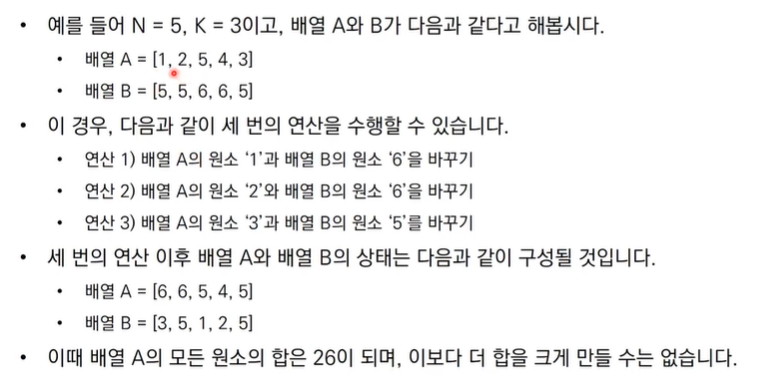

In [69]:
# 매번 배열 A에서 가장 작은 원소를 골라서, 배열 B에서 가장 큰 원소와 교체합니다.
# 가장 먼저 배열 A와 B가 주어지면, A에 대하여 오름차순 정렬하고, B에 대하여 내림차순 정렬합니다.
# 이후에 두 배열의 원소를 첫 번째 인덱스부터 차례대로 확인하면서 A의 원소가 B의 원소보다 작을 때에만 교체를 수행합니다.

n, k = map(int, input().split())# n와 k의 입력 받기
a = list(map(int, input().split())) # 배열 a의 모든 원소를 입력 받기
b = list(map(int, input().split())) # 배열 b의 모든 원소를 입력 받기

a.sort() # 배열 A는 오름차순 정렬 수행
b.sort(reverse=True) # 배열 B는 내림차순 정렬 수행

# 첫번째 인덱스부터 확인하며, 두 배열의 원소를 최대 K번 비교
for i in range(k):
    # A의 원소가 B의 원소보다 작은 경우
    if a[i] < b[i]:
        #  두 원소를 교체
        a[i],b[i] = b[i],a[i]
    else: # A의 원소가 B의 원소보다 크거나 같을 때, 반복문을 탈출
        break

print(sum(a)) # 배열 A의 모든 원소의 합을 출력

5 3
1 2 5 4 3
5 5 6 6 5
26
